In [1]:
import numpy as np
import pandas as pd
from pandas import Series as ser
from pandas import DataFrame as df
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PowerTransformer , StandardScaler , LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import  classification_report , confusion_matrix , roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Train_Set_TVS.csv")
test = pd.read_csv("Test_Set_TVS.csv")

In [4]:
train.head(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [5]:
test.head(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [6]:
train.shape , test.shape

((132440, 33), (56760, 32))

In [7]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(189200, 33)

In [8]:
combi.head(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [9]:
combi.tail(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
189195,513665,671640.0,N,260085.0,9654.50,0.0050,IT,ndf,One,4.0,...,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0,NaN
189196,450327,650680.0,N,714467.6,14063.75,0.0321,NaN,ndf,One,NaN,...,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0,NaN
189197,476417,551374.0,NaN,231420.0,11299.78,0.0334,Govt.,df,None,2.0,...,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0,NaN
189198,461152,975117.0,N,1096620.0,10223.30,0.0052,IT,ndf,One,4.0,...,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0,NaN
189199,524075,NaN,N,197232.0,12178.59,0.0155,IT,ndf,One,4.0,...,East,39.0,11.0,Yes,No,0.237,0.237,NaN,2.0,NaN


In [10]:
combi.ID.unique().shape

(189200,)

In [11]:
combi.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [12]:
combi.isna().sum()

ID                        0
Compensation           8992
Vehicle_Status        12987
Loan_amt                  0
Annuity_amt            6574
density_Ind            7691
Job_Type              14568
Default_hist              0
Prop_List              2876
Home_Appliances       15723
Region_Type               0
Credit_Inq             3856
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            31196
Income_Alt            10981
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        16784
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              24876
c2_rated              18976
Contact_age           11675
Product_bought            0
Default               56760
dtype: int64

In [13]:
combi.drop("ID" , axis=1 , inplace = True)

In [14]:
df_num = combi.select_dtypes(np.number)

In [15]:
df_num.drop("Default" , axis=1 , inplace= True)

In [16]:
df_num.head(5)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0
1,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0
2,284120.0,101056.0,8390.40,0.0118,4.0,NaN,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0
3,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,NaN,0.561,20.0,4.0
4,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,NaN,0.200,2339.0,6.0


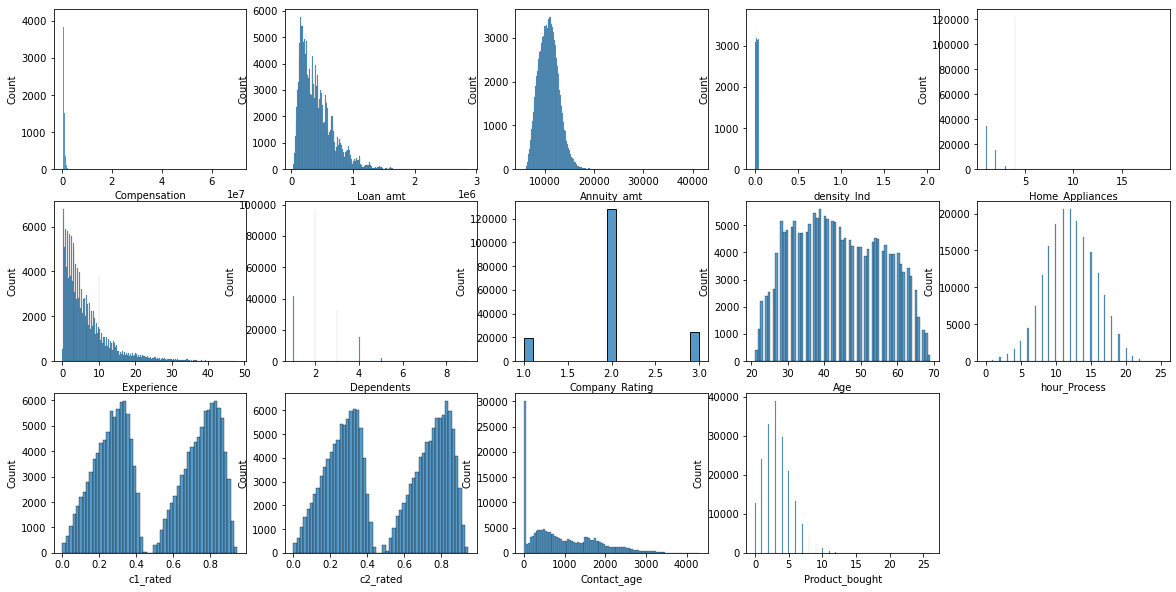

In [17]:
plt.figure(figsize =(20,10))
a=3
b=5
c=1
for i in df_num:
    plt.subplot(a,b,c)
    sns.histplot(df_num[i])
    c=c+1
        

In [18]:
df_cat = combi.select_dtypes(object)

In [19]:
df_cat.head(5)

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


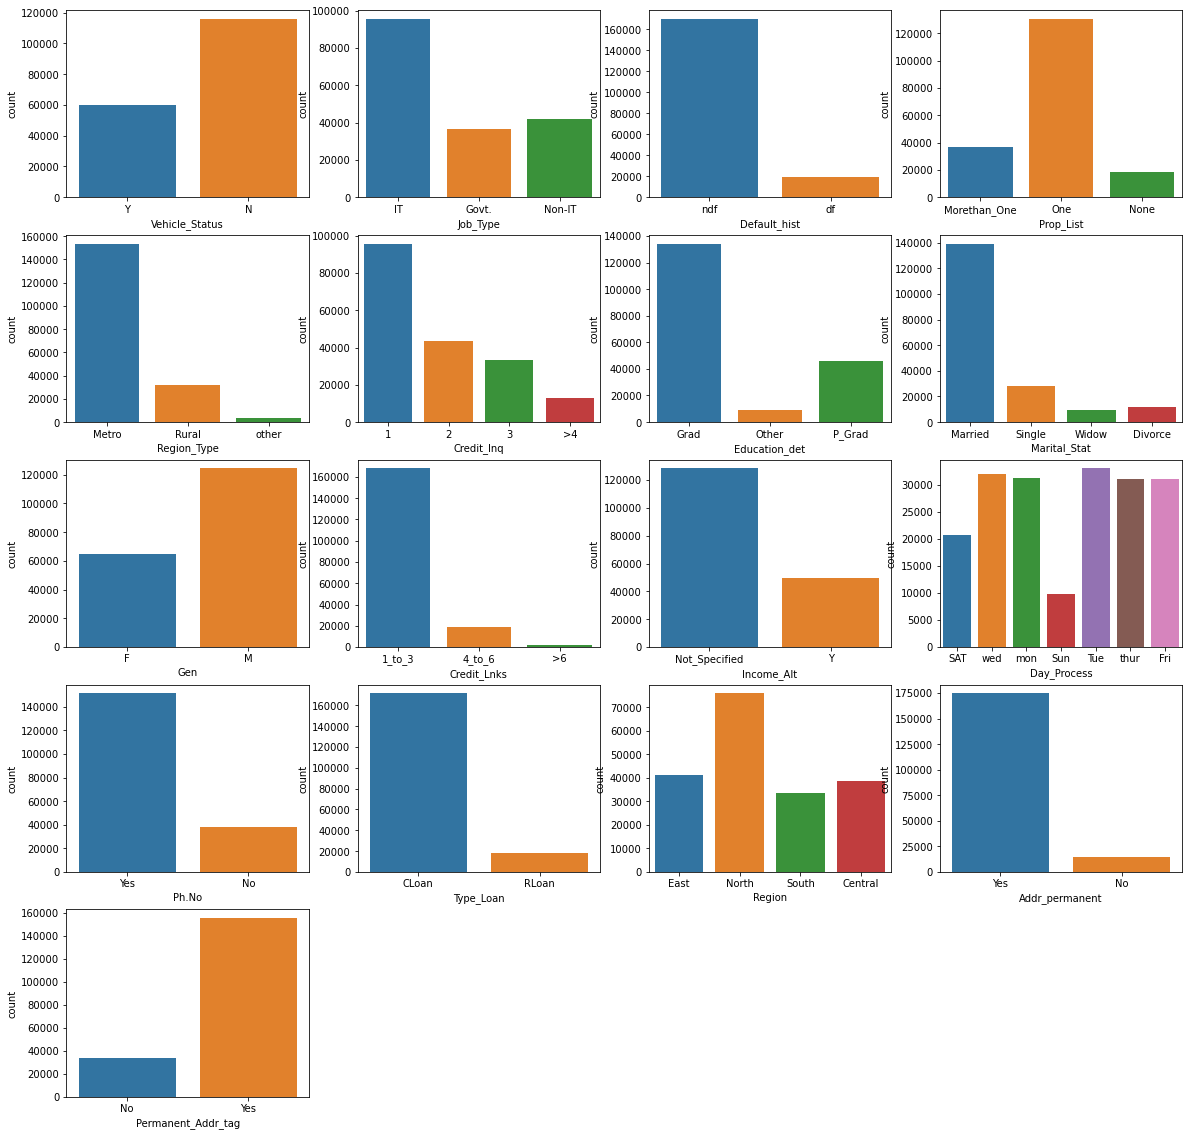

In [20]:
plt.figure(figsize =(20,20))
a=5
b=4
c=1
for i in df_cat:
    plt.subplot(a,b,c)
    sns.countplot(df_cat[i])
    c=c+1
        

<AxesSubplot:>

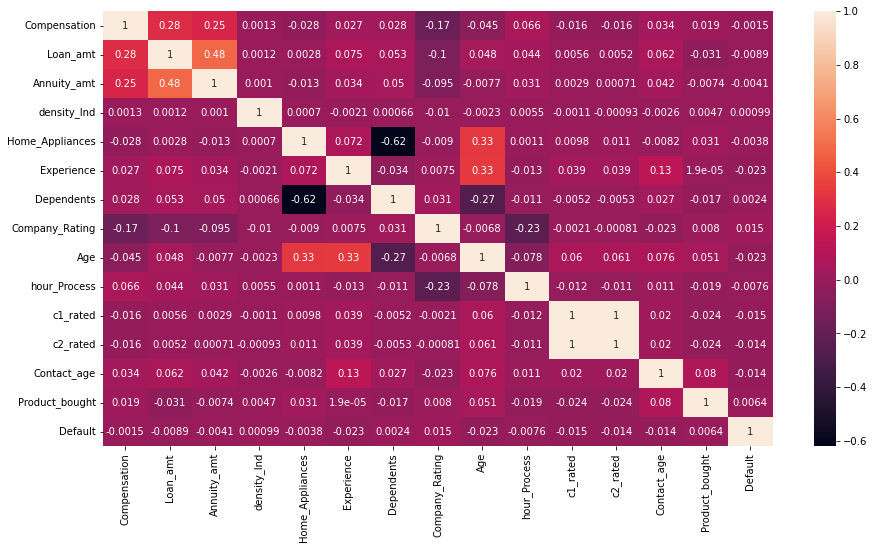

In [21]:
plt.figure(figsize =(15,8))

sns.heatmap(combi.corr(), annot = True)

In [22]:
combi["Education_det"]

0          Grad
1          Grad
2         Other
3          Grad
4          Grad
          ...  
189195     Grad
189196     Grad
189197     Grad
189198    Other
189199     Grad
Name: Education_det, Length: 189200, dtype: object

In [23]:
combi["Compensation"].mean()

744230.4385765338

In [24]:
combi[combi["Education_det"]== "Grad"]["Compensation"].mean()

695689.5712922552

In [25]:
combi[combi["Education_det"]== "P_Grad"]["Compensation"].mean()


884671.6559885413

In [26]:
combi[combi["Education_det"]== "Other"]["Compensation"].mean()

747692.5101553166

In [27]:
combi[combi["Job_Type"]== "IT"]["Compensation"].mean()

714860.1231231231

In [28]:
combi[combi["Job_Type"]== "Govt."]["Compensation"].mean()

704820.1158327622

In [29]:
combi[combi["Job_Type"]== "Non-IT"]["Compensation"].mean()

846738.7363522954

In [30]:
combi

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189195,671640.0,N,260085.0,9654.50,0.0050,IT,ndf,One,4.0,Metro,...,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0,NaN
189196,650680.0,N,714467.6,14063.75,0.0321,NaN,ndf,One,NaN,Metro,...,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0,NaN
189197,551374.0,NaN,231420.0,11299.78,0.0334,Govt.,df,None,2.0,Metro,...,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0,NaN
189198,975117.0,N,1096620.0,10223.30,0.0052,IT,ndf,One,4.0,Metro,...,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0,NaN


In [31]:
combi['Compensation'] = combi.groupby('Education_det')['Compensation'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

In [32]:
combi["Compensation"].isna().sum()

0

<AxesSubplot:ylabel='Density'>

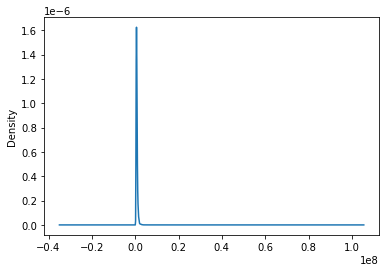

In [33]:
combi["Compensation"].plot(kind="density")

In [34]:
combi["Vehicle_Status"].value_counts()

N    116091
Y     60122
Name: Vehicle_Status, dtype: int64

In [35]:
combi['Vehicle_Status'].replace(np.NaN, "N", inplace = True)

<AxesSubplot:ylabel='Density'>

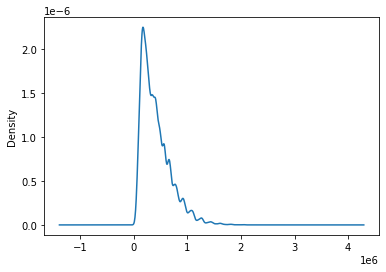

In [36]:
combi["Loan_amt"].plot(kind="density")

<AxesSubplot:ylabel='Density'>

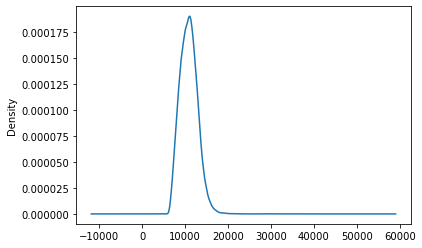

In [37]:
combi["Annuity_amt"].plot(kind="density")

In [38]:
combi["Annuity_amt"].unique()

array([13816.52, 11173.06,  8390.4 , ..., 14063.75, 11299.78, 10223.3 ])

In [39]:
combi["Annuity_amt"].mean() , combi["Annuity_amt"].median() , combi["Annuity_amt"].mode()

(10841.400309101627,
 10768.665,
 0     8931.30
 1     9849.37
 2    10584.74
 3    10774.62
 4    10855.91
 5    11247.95
 6    11522.15
 7    11612.50
 8    12055.05
 dtype: float64)

In [40]:
combi['Annuity_amt'].replace(np.NaN,10768.665 , inplace = True)

In [41]:
combi['Annuity_amt'].isna().sum()

0

In [42]:
combi["density_Ind"].unique()

array([3.0400e-02, 1.9400e-02, 1.1800e-02, 3.7300e-02, 1.3800e-02,
       2.3600e-02, 8.9000e-03, 6.2000e-03, 3.6800e-02, 3.4500e-02,
       4.8000e-03, 8.0000e-04, 2.1000e-02, 1.7000e-03, 1.0500e-02,
       3.6500e-02, 3.0300e-02, 5.7000e-03,        nan, 1.7200e-02,
       3.5100e-02, 7.9000e-03, 2.0000e-03, 1.5500e-02, 1.5700e-02,
       1.4800e-02, 1.9000e-03, 4.9000e-03, 2.7700e-02, 2.4200e-02,
       1.2500e-02, 2.7200e-02, 2.0200e-02, 2.5000e-02, 2.5700e-02,
       8.1000e-03, 1.6800e-02, 3.2700e-02, 3.1700e-02, 9.2000e-03,
       2.2300e-02, 1.6200e-02, 1.0900e-02, 5.2000e-03, 2.9300e-02,
       2.2600e-02, 1.7700e-02, 3.9100e-02, 2.6600e-02, 2.9200e-02,
       1.4000e-03, 6.9000e-03, 3.8600e-02, 1.8900e-02, 2.7500e-02,
       4.0100e-02, 2.5600e-02, 2.0500e-02, 3.1000e-02, 1.7000e-02,
       2.6200e-02, 2.4500e-02, 2.4300e-02, 2.8100e-02, 2.6800e-02,
       2.4000e-02, 8.2000e-03, 1.5000e-02, 3.5500e-02, 2.0300e-02,
       1.1100e-02, 2.1100e-02, 1.9600e-02, 1.3900e-02, 2.3000e

In [43]:
combi["Region_Type"].value_counts()

Metro    153596
Rural     31804
other      3800
Name: Region_Type, dtype: int64

In [44]:
combi[combi["Region"]== "North"]["density_Ind"].mean() ,combi[combi["Region"]== "South"]["density_Ind"].mean(),combi[combi["Region"]== "East"]["density_Ind"].mean(), combi[combi["Region"]== "Central"]["density_Ind"].mean()

(0.02052045036890775,
 0.020410499797841628,
 0.02037119621581956,
 0.020438086980083994)

In [45]:
combi[combi["Region_Type"]== "Metro"]["density_Ind"].mean() ,combi[combi["Region_Type"]== "Rural"]["density_Ind"].mean(),combi[combi["Region_Type"]== "other"]["density_Ind"].mean()

(0.02042905990445801, 0.020521459030374643, 0.02078363885088915)

In [46]:
combi['density_Ind'] = combi.groupby('Region_Type')['density_Ind'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

In [47]:
combi['density_Ind'].isna().sum()

0

In [48]:
combi['Job_Type'].replace(np.NaN,"IT" , inplace = True)

In [49]:
combi['Job_Type'].isna().sum()

0

In [50]:
combi['Default_hist'].unique()

array(['ndf', 'df'], dtype=object)

In [51]:
combi['Default_hist'].replace("df",1 , inplace = True)
combi['Default_hist'].replace("ndf",0 , inplace = True)

In [52]:
combi['Prop_List'].value_counts()

One             130781
Morethan_One     36942
None             18601
Name: Prop_List, dtype: int64

In [53]:
combi['Prop_List'].replace(np.nan,"One" , inplace = True)


In [54]:
combi['Prop_List'].isna().sum()

0

In [55]:
combi['Home_Appliances'].value_counts()

4.0     121796
1.0      34324
2.0      15108
3.0       2173
5.0         43
6.0         17
10.0         3
7.0          3
14.0         3
19.0         2
12.0         2
8.0          2
9.0          1
Name: Home_Appliances, dtype: int64

In [56]:
combi['Home_Appliances'].replace(np.nan,4.0 , inplace = True)

In [57]:
combi['Credit_Inq'].value_counts()

1     95775
2     43392
3     33176
>4    13001
Name: Credit_Inq, dtype: int64

In [58]:
combi['Credit_Inq'].replace(np.nan,1 , inplace = True)

In [59]:
combi['Experience'].unique()

array([ 0.9,  3. ,  nan,  4.7,  6.9, 19.6,  4.1, 13.6,  7.6,  1.3,  2.4,
        1.2, 10.7,  2.5,  5.3, 12.8, 18.7,  1.7,  3.9, 12. , 10.3,  1. ,
        6.3,  7.7,  5.7, 10.5,  7.9, 13.3,  3.7,  1.1, 11.3,  8.2,  6.5,
        6.2,  2.8,  4.5,  2.3,  5.2,  4.2,  0.7, 17.5,  5.1,  7.1, 13.8,
        5. ,  3.3, 21.2, 21.7,  1.6,  8.8,  6.1, 10.8, 19.1, 13.1, 15.6,
       17.7, 10. ,  1.8, 23.9, 15. ,  3.4,  7.8,  5.6,  8. ,  1.4,  0.6,
       17.8,  5.8, 17.6, 11.2,  1.9,  9.8, 35.1,  6.6,  4.6,  3.6,  4.9,
        7.5,  3.2,  9.7,  5.5,  9.6,  3.8,  0.5,  2.1,  2.6,  2.2,  9.4,
       10.1,  3.5,  2. , 11.9,  1.5, 29.2, 11.1,  6. , 14.9, 16.9, 22. ,
        7. ,  2.9, 13.9, 24.1,  0.3,  4.4, 11.6,  9.3, 10.4, 16. ,  0.4,
        8.3,  2.7, 34. ,  0.2,  0.8, 11.7,  8.6,  5.4, 14.4,  6.8, 11.8,
       12.3,  4.3,  7.4, 18.9,  3.1,  9. , 19.5, 11.5,  9.2, 19.2, 14.5,
        9.1, 22.3,  8.9,  8.7, 11. , 17.3, 13.2,  6.4,  6.7,  8.5,  4. ,
       14.1, 23.4,  8.4, 20.1,  5.9, 23.2, 15.5, 12

In [60]:
combi['Experience'].mean() , combi['Experience'].median() , combi['Experience'].mode()

(6.583514974304075,
 4.6,
 0    10.1
 dtype: float64)

<AxesSubplot:xlabel='Experience'>

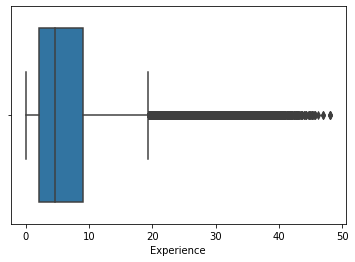

In [61]:
sns.boxplot(combi['Experience'])

In [62]:
combi['Experience'].replace(np.nan,4.6 , inplace = True)

In [63]:
combi['Dependents'].unique()

array([3., 2., 4., 1., 5., 6., 8., 7., 9.])

In [64]:
combi["hour_Process"].unique()

array([10., 12.,  5., 16., 14.,  9.,  8., 11., 13., 15.,  6., 18., 20.,
       17.,  7., 19.,  2.,  3.,  1.,  4.,  0., 22., 21., 24., 23., 25.])

In [65]:
combi["Company_Rating"].value_counts()

2.0    128441
3.0     24568
1.0     19407
Name: Company_Rating, dtype: int64

In [66]:
combi["Company_Rating"].replace(np.nan,2 , inplace = True)

In [67]:
combi["c1_rated"].unique().shape

(871,)

In [68]:
combi["c1_rated"].mean() ,combi["c1_rated"].median() , combi["c1_rated"].mode()

(0.5057720235632123,
 0.5,
 0    0.826
 dtype: float64)

In [69]:
combi["c1_rated"].replace(np.nan,0.5 , inplace = True)

In [70]:
combi["c2_rated"].mean() ,combi["c2_rated"].median() , combi["c2_rated"].mode()

(0.5061731776952824,
 0.5,
 0    0.826
 dtype: float64)

In [71]:
### Since c1 and c2 are having same exact values we can drop either of them..
combi.drop("c2_rated" , axis =1 , inplace = True)

In [72]:
combi["Contact_age"].unique()

array([  18.,  306.,  281., ..., 3615., 3792., 3933.])

In [73]:
combi["Contact_age"].mean() ,combi["Contact_age"].median() , combi["Contact_age"].mode()

(977.1631601182931,
 769.0,
 0    19.0
 dtype: float64)

In [74]:
combi["Contact_age"].replace(np.nan,769 , inplace = True)

In [75]:
combi["Income_Alt"].value_counts()

Not_Specified    128289
Y                 49930
Name: Income_Alt, dtype: int64

In [76]:
combi["Income_Alt"].replace(np.nan,"Not_Specified" , inplace = True)

In [77]:
combi.isna().sum()

Compensation              0
Vehicle_Status            0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Job_Type                  0
Default_hist              0
Prop_List                 0
Home_Appliances           0
Region_Type               0
Credit_Inq                0
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience                0
Income_Alt                0
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated                  0
Contact_age               0
Product_bought            0
Default               56760
dtype: int64

In [78]:
df_num = combi.select_dtypes(np.number)

In [79]:
df_num.drop("Default" , axis=1 , inplace=True)

In [80]:
df_num.drop("Annuity_amt" , axis=1 , inplace=True)

In [81]:
vif = pd.DataFrame() 
vif['VIF_Factor'] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])] 
vif['Features'] = df_num.columns 
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,15.156755,Age
1,14.557628,Company_Rating
2,12.550103,Dependents
3,11.128442,Home_Appliances
4,10.389057,hour_Process
5,4.920737,c1_rated
6,4.185613,Compensation
7,3.608353,Loan_amt
8,3.418968,Product_bought
9,2.739727,density_Ind


In [82]:
combi["Default_hist"] = combi["Default_hist"].astype(int)
combi["Company_Rating"] = combi["Company_Rating"].astype(int)
combi["Age"] = combi["Age"].astype(int)
combi["hour_Process"] = combi["hour_Process"].astype(int)
combi["Dependents"] = combi["Dependents"].astype(int)
combi["Contact_age"] = combi["Contact_age"].astype(int)
combi["Product_bought"] = combi["Product_bought"].astype(int)

In [83]:
combi.dtypes

Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist            int32
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents              int32
Company_Rating          int32
Region                 object
Age                     int32
hour_Process            int32
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
Contact_age             int32
Product_bought          int32
Default               float64
dtype: object

<AxesSubplot:xlabel='Default', ylabel='count'>

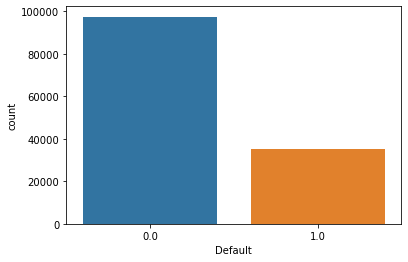

In [84]:
sns.countplot(combi["Default"])

In [85]:
combi1= pd.get_dummies(combi , drop_first=True)

In [86]:
newtrain = combi1.loc[0:train.shape[0]-1]
newtest = combi1.loc[train.shape[0]:, ]
newtest.drop("Default" , axis=1 , inplace=True)
newtrain.shape,newtest.shape,train.shape,test.shape

((132440, 48), (56760, 47), (132440, 33), (56760, 32))

In [87]:
newtrain["Default"] = newtrain["Default"].astype(int)

In [88]:
x1 = newtrain.drop("Default" , axis =1 )
y1= newtrain["Default"]
x2= sm.add_constant(x1)
rf = sm.OLS(y1 ,x2).fit()
rf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.711
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           2.26e-41
Time:                        14:04:17   Log-Likelihood:                -79325.
No. Observations:              132440   AIC:                         1.587e+05
Df Residuals:                  132392   BIC:                         1.592e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3169      0.019     16.260      0.000       0.279       0.355
Compensation             3.94e-09   2.86e-09      1.376      0.169   -1.67e-09    9.55e-09
Loan_amt               -6.639e-09   5.24e-09     -1.266      0.206   -1.69e-08    3.64e-09
Annuity_amt            -2.612e-08   6.91e-07     -0.038      0.970   -1.38e-06    1.33e-06
density_Ind                0.0284      0.082      0.347      0.729      -0.132       0.189
Default_hist               0.0171      0.029      0.581      0.561      -0.041       0.075
Home_Appliances           -0.0027      0.003     -1.056      0.291      -0.008       0.002
Experience                -0.0010      0.000     -4.346      0.000      -0.001      -0.001
Dependents             -4.786e-05      0.004     -0.013      0.990      -0.007       0.007
Company_Rating             0.0106      0.003      4.009      0.000       0.005       0.016
Age                       -0.0006      0.000     -4.496      0.000      -0.001      -0.000
hour_Process              -0.0006      0.000     -1.826      0.068      -0.001    4.71e-05
c1_rated                  -0.0204      0.005     -4.214      0.000      -0.030      -0.011
Contact_age            -5.721e-06   1.53e-06     -3.729      0.000   -8.73e-06   -2.71e-06
Product_bought             0.0013      0.001      2.358      0.018       0.000       0.002
Vehicle_Status_Y          -0.0097      0.003     -3.452      0.001      -0.015      -0.004
Job_Type_IT               -0.0055      0.003     -1.734      0.083      -0.012       0.001
Job_Type_Non-IT           -0.0072      0.004     -1.868      0.062      -0.015       0.000
Prop_List_None            -0.0178      0.029     -0.616      0.538      -0.074       0.039
Prop_List_One              0.0108      0.009      1.260      0.208      -0.006       0.028
Region_Type_Rural         -0.0018      0.003     -0.539      0.590      -0.008       0.005
Region_Type_other         -0.0041      0.009     -0.467      0.641      -0.021       0.013
Credit_Inq_1               0.0198      0.009      2.274      0.023       0.003       0.037
Credit_Inq_2               0.0183      0.009      2.060      0.039       0.001       0.036
Credit_Inq_3               0.0119      0.009      1.272      0.203      -0.006       0.030
Credit_Inq_>4              0.0195      0.010      1.995      0.046       0.000       0.039
Education_det_Other       -0.0042      0.006     -0.719      0.472      -0.016       0.007
Education_det_P_Grad      -0.0165      0.003     -5.560      0.000      -0.022      -0.011
Marital_Stat_Married       0.0031      0.006      0.502      0.616      -0.009       0.015
Marital_Stat_Single       -0.0015      0.006     -0.263      0.792      -0.013       0.010
Marital_Stat_Widow         0.0112      0.007      1.529      0.126      -0.003  

In [89]:
pvalue=rf.pvalues
pval=pd.DataFrame(pvalue)
signi=pval[pval[0]<0.05].index

In [90]:
signi

Index(['const', 'Experience', 'Company_Rating', 'Age', 'c1_rated',
       'Contact_age', 'Product_bought', 'Vehicle_Status_Y', 'Credit_Inq_1',
       'Credit_Inq_2', 'Credit_Inq_>4', 'Education_det_P_Grad', 'Gen_M',
       'Ph.No_Yes', 'Type_Loan_RLoan', 'Addr_permanent_Yes'],
      dtype='object')

In [93]:
signi = newtrain[['Experience', 'Company_Rating', 'Age',
       'c1_rated', 'Contact_age', 'Product_bought', 'Credit_Inq_1',
       'Credit_Inq_2', 'Credit_Inq_>4', 'Education_det_P_Grad', 'Gen_M',
       'Ph.No_Yes', 'Type_Loan_RLoan', 'Addr_permanent_Yes']]

In [94]:
y1= newtrain["Default"]
x2= sm.add_constant(signi)
rf1 = sm.OLS(y1 ,x2).fit()
rf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.80
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           5.81e-48
Time:                        14:05:40   Log-Likelihood:                -79351.
No. Observations:              132440   AIC:                         1.587e+05
Df Residuals:                  132425   BIC:                         1.589e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3070      0.011     28.288      0.000       0.286       0.328
Experience              -0.0011      0.000     -4.767      0.000      -0.001      -0.001
Company_Rating           0.0117      0.003      4.612      0.000       0.007       0.017
Age                     -0.0005      0.000     -3.801      0.000      -0.001      -0.000
c1_rated                -0.0205      0.005     -4.222      0.000      -0.030      -0.011
Contact_age          -6.107e-06   1.53e-06     -3.998      0.000    -9.1e-06   -3.11e-06
Product_bought           0.0015      0.001      2.637      0.008       0.000       0.003
Credit_Inq_1             0.0086      0.004      2.165      0.030       0.001       0.016
Credit_Inq_2             0.0070      0.004      1.597      0.110      -0.002       0.016
Credit_Inq_>4            0.0079      0.006      1.321      0.187      -0.004       0.020
Education_det_P_Grad    -0.0181      0.003     -6.301      0.000      -0.024      -0.012
Gen_M                   -0.0095      0.003     -3.644      0.000      -0.015      -0.004
Ph.No_Yes               -0.0064      0.003     -2.060      0.039      -0.013      -0.000
Type_Loan_RLoan         -0.0096      0.004     -2.306      0.021      -0.018      -0.001
Addr_permanent_Yes      -0.0183      0.005     -3.976      0.000      -0.027      -0.009
==============================================================================
Omnibus:                    31770.430   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29100.830
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       2.146   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
pvalue=rf.pvalues
pval=pd.DataFrame(pvalue)
signi=pval[pval[0]<0.05].index
signi

Index(['const', 'Experience', 'Company_Rating', 'Age', 'c1_rated',
       'Contact_age', 'Product_bought', 'Vehicle_Status_Y', 'Credit_Inq_1',
       'Credit_Inq_2', 'Credit_Inq_>4', 'Education_det_P_Grad', 'Gen_M',
       'Ph.No_Yes', 'Type_Loan_RLoan', 'Addr_permanent_Yes'],
      dtype='object')

In [96]:
signi = newtrain[['Experience', 'Company_Rating', 'Age',
       'c1_rated', 'Contact_age', 'Product_bought', 'Credit_Inq_1',
       'Credit_Inq_2', 'Credit_Inq_>4', 'Education_det_P_Grad', 'Gen_M',
       'Ph.No_Yes', 'Type_Loan_RLoan', 'Addr_permanent_Yes']]

In [97]:
y1= newtrain["Default"]
x2= sm.add_constant(signi)
rf1 = sm.OLS(y1 ,x2).fit()
rf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.80
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           5.81e-48
Time:                        14:06:05   Log-Likelihood:                -79351.
No. Observations:              132440   AIC:                         1.587e+05
Df Residuals:                  132425   BIC:                         1.589e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3070      0.011     28.288      0.000       0.286       0.328
Experience              -0.0011      0.000     -4.767      0.000      -0.001      -0.001
Company_Rating           0.0117      0.003      4.612      0.000       0.007       0.017
Age                     -0.0005      0.000     -3.801      0.000      -0.001      -0.000
c1_rated                -0.0205      0.005     -4.222      0.000      -0.030      -0.011
Contact_age          -6.107e-06   1.53e-06     -3.998      0.000    -9.1e-06   -3.11e-06
Product_bought           0.0015      0.001      2.637      0.008       0.000       0.003
Credit_Inq_1             0.0086      0.004      2.165      0.030       0.001       0.016
Credit_Inq_2             0.0070      0.004      1.597      0.110      -0.002       0.016
Credit_Inq_>4            0.0079      0.006      1.321      0.187      -0.004       0.020
Education_det_P_Grad    -0.0181      0.003     -6.301      0.000      -0.024      -0.012
Gen_M                   -0.0095      0.003     -3.644      0.000      -0.015      -0.004
Ph.No_Yes               -0.0064      0.003     -2.060      0.039      -0.013      -0.000
Type_Loan_RLoan         -0.0096      0.004     -2.306      0.021      -0.018      -0.001
Addr_permanent_Yes      -0.0183      0.005     -3.976      0.000      -0.027      -0.009
==============================================================================
Omnibus:                    31770.430   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29100.830
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       2.146   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
xtrain ,xtest, ytrain , ytest = train_test_split(signi,y1,test_size=.3 , random_state=0)

In [100]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier()
dt_default.fit(xtrain, ytrain)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(xtest)

# Printing classification report
print(classification_report(ytest, y_pred_default))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     29268
           1       0.27      0.29      0.28     10464

    accuracy                           0.61     39732
   macro avg       0.50      0.50      0.50     39732
weighted avg       0.62      0.61      0.61     39732



In [101]:
dt_default = RandomForestClassifier()
dt_default.fit(xtrain, ytrain)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(xtest)

# Printing classification report
print(classification_report(ytest, y_pred_default))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     29268
           1       0.27      0.02      0.04     10464

    accuracy                           0.73     39732
   macro avg       0.50      0.50      0.44     39732
weighted avg       0.61      0.73      0.63     39732



In [ ]:
dt_default = GradientBoostingClassifier()
dt_default.fit(xtrain, ytrain)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(xtest)

# Printing classification report
print(classification_report(ytest, y_pred_default))

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
dt_default = LGBMClassifier()
dt_default.fit(xtrain, ytrain)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(xtest)

# Printing classification report
print(classification_report(ytest, y_pred_default))

In [ ]:
---------------------------------------------------------------------------------------------------------

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
X = newtrain.drop('Default', axis=1)  
y = newtrain['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y, random_state=2)

In [104]:
sm = SMOTE(random_state=1)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

130564
65282


In [105]:
rf= RandomForestClassifier()
model = rf.fit(X_SMOTE, y_SMOTE)
pred = rf.predict(X_test)
print(classification_report(y_test , pred))
print(confusion_matrix(y_test , pred))
accuracy_score(y_test , pred)

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     32154
           1       0.27      0.03      0.06     11552

    accuracy                           0.72     43706
   macro avg       0.50      0.50      0.45     43706
weighted avg       0.61      0.72      0.63     43706

[[31122  1032]
 [11170   382]]


0.7208163638859653

In [106]:
dt= DecisionTreeClassifier()
model = dt.fit(X_SMOTE, y_SMOTE)
pred = dt.predict(X_test)
print(classification_report(y_test , pred))
print(confusion_matrix(y_test , pred))
accuracy_score(y_test , pred)

              precision    recall  f1-score   support

           0       0.74      0.69      0.71     32154
           1       0.27      0.32      0.29     11552

    accuracy                           0.59     43706
   macro avg       0.50      0.50      0.50     43706
weighted avg       0.61      0.59      0.60     43706

[[22155  9999]
 [ 7886  3666]]


0.5907884500983847

In [ ]:
def plot_roc(model):
    y_pred_prob = gbm.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(gbm)    

In [108]:
x=newtrain.drop("Default" , axis=1)
y=newtrain["Default"]


In [109]:
dt = DecisionTreeClassifier()
model5 = dt.fit(x, y)
pred5 = dt.predict(newtest)

In [111]:
testing = pd.DataFrame()
testing["ID"] = test["ID"]
testing

,ID
0,487410
1,533258
2,581926
3,486301
4,580822
...,...
56755,513665
56756,450327
56757,476417
56758,461152


In [112]:
testing["Default"] = pred5
testing.to_csv("dt.csv" , index = False)
testing.head(5)

,ID,Default
0,487410,0
1,533258,0
2,581926,1
3,486301,0
4,580822,0


In [113]:
sm = SMOTE(random_state=1)
X_SMOTE, y_SMOTE = sm.fit_resample(x, y)

In [114]:
dt= DecisionTreeClassifier()
model = dt.fit(X_SMOTE, y_SMOTE)
pred = dt.predict(newtest)

In [115]:
testing1 = pd.DataFrame()
testing1["ID"] = test["ID"]
testing1

,ID
0,487410
1,533258
2,581926
3,486301
4,580822
...,...
56755,513665
56756,450327
56757,476417
56758,461152


In [116]:
testing1["Default"] = pred
testing1.to_csv("dt_2.csv" , index = False)
testing1.head(5)

,ID,Default
0,487410,0
1,533258,0
2,581926,0
3,486301,0
4,580822,0


In [117]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [118]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.887034,0.006065,0.013165,0.000400,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.735692,0.735692,0.735692,0.735692,0.735729,0.735699,0.000015,1
3,0.886041,0.002828,0.013370,0.000484,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.735692,0.735692,0.735692,0.735692,0.735729,0.735699,0.000015,1
10,0.766365,0.008781,0.015151,0.003405,gini,5,100,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.735692,0.735692,0.735692,0.735692,0.735729,0.735699,0.000015,1
11,0.762769,0.002112,0.016548,0.003756,gini,5,100,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.735692,0.735692,0.735692,0.735692,0.735729,0.735699,0.000015,1
0,0.893804,0.009641,0.013409,0.000459,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.735692,0.735692,0.735692,0.735314,0.735503,0.735578,0.000151,5
